<h1>Future Mars City Vegetation Growth Simulation</h1>
1. Import Washington DC incoming solar radiation and leaf area index data<br>
2. Apply calculations to simulate vegetation growth during the same time period on a Martian City

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# IMPORT WASHINGTON DC DATA FROM CSV
data = pd.read_csv('SolarRadiationVsLeafAreaIndex2001-2020.csv')

In [4]:
data.sample(5)

,DATETIME,TIME,Leaf_Area_Index_Dimensionless,Incoming_Solar_Radiation_Watts_perSqMtr
23,01/12/2002,23,1.19,80.29
224,01/09/2019,224,1.31,195.25
147,01/04/2013,147,1.11,221.83
230,01/03/2020,230,0.42,149.83
35,01/12/2003,35,0.39,89.06


In [5]:
print(f'Any NaN values among the data? {data.isna().values.any()}')

Any NaN values among the data? False


In [6]:
print(f'Any duplicates? {data.duplicated().values.any()}')

duplicated_rows = data[data.duplicated()]
print(f'Number of duplicates: {len(duplicated_rows)}')

Any duplicates? False
Number of duplicates: 0


In [7]:
data.describe()

,TIME,Leaf_Area_Index_Dimensionless,Incoming_Solar_Radiation_Watts_perSqMtr
count,233.00,233.00,233.00
mean,116.00,1.53,169.65
std,67.41,1.10,62.74
min,0.00,0.25,63.08
25%,58.00,0.53,109.86
50%,116.00,1.33,172.88
75%,174.00,2.21,227.04
max,232.00,5.01,285.18


In [8]:
# Show NaN values and data types per column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   DATETIME                                 233 non-null    object 
 1   TIME                                     233 non-null    int64  
 2   Leaf_Area_Index_Dimensionless            233 non-null    float64
 3   Incoming_Solar_Radiation_Watts_perSqMtr  233 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.4+ KB


In [9]:
data.drop(['TIME'], axis=1, inplace=True)
data.head()

,DATETIME,Leaf_Area_Index_Dimensionless,Incoming_Solar_Radiation_Watts_perSqMtr
0,01/01/2001,0.33,90.67
1,01/02/2001,0.33,129.97
2,01/03/2001,0.42,163.18
3,01/04/2001,1.52,203.81
4,01/05/2001,4.58,230.21


In [10]:
# Convert DATETIME column to Pandas Datetime data type
data.DATETIME = pd.to_datetime(data.DATETIME)

In [11]:
# Add DC CSV data columns into Dataframe
X = DataFrame(data, columns=['Incoming_Solar_Radiation_Watts_perSqMtr'])
y = DataFrame(data, columns=['Leaf_Area_Index_Dimensionless'])

# Mars Simulation:
## Apply calculation to lessen sun intensity Mars vegetation would be exposed to

Divide vegetation level reading by incoming solar radiation reading to find percentage of growth</br>
Multiply the incoming solar radiation readings by 0.431 to reduce exposure as on Mars (round to 6 places)</br>
Multiply the percentage growth of each reading by reduced exposure level. to find percentage growth as on Mars (round to 6 places)


In [12]:
#Divide DC veg level readings by DC incoming solar to find growth percentage

DC_veg = y['Leaf_Area_Index_Dimensionless'].values
DC_solar = X['Incoming_Solar_Radiation_Watts_perSqMtr'].values

perc_growth =[] #perc_growth new 1D array to store percentage levels
r = 0 #r is each DC solar reading array index
for v in DC_veg:
  DC_growth = (v / DC_solar[r])
  r = r + 1
  perc_growth.append(round(DC_growth, 6)) #DC_growth is % growth to solar level

print(perc_growth)

[0.003596, 0.00251, 0.002593, 0.007446, 0.01988, 0.014991, 0.007474, 0.012652, 0.014966, 0.009344, 0.005699, 0.004735, 0.008494, 0.00525, 0.002616, 0.006302, 0.013009, 0.012931, 0.01254, 0.00378, 0.010834, 0.019016, 0.022677, 0.014821, 0.004675, 0.003303, 0.002465, 0.006573, 0.007329, 0.007985, 0.012073, 0.010496, 0.00922, 0.009355, 0.00871, 0.004337, 0.003415, 0.002235, 0.002628, 0.014224, 0.01386, 0.01268, 0.01136, 0.010555, 0.009933, 0.013184, 0.008603, 0.008962, 0.005442, 0.00268, 0.002639, 0.003831, 0.01616, 0.010341, 0.004488, 0.011825, 0.008463, 0.012789, 0.012294, 0.00334, 0.005337, 0.002619, 0.002258, 0.004364, 0.014276, 0.015411, 0.009893, 0.00968, 0.010897, 0.011022, 0.006741, 0.007994, 0.003773, 0.002788, 0.002173, 0.004552, 0.012981, 0.01304, 0.013015, 0.014957, 0.009678, 0.012515, 0.005691, 0.011995, 0.0039, 0.004137, 0.003091, 0.004542, 0.013488, 0.012339, 0.010583, 0.010633, 0.010037, 0.009621, 0.004939, 0.00631, 0.004895, 0.003136, 0.002426, 0.00602, 0.017479, 0.016166

In [14]:
#Multiply incoming solar readings by 0.431 to reduce exposure as on Mars

Mars_solar = [] #new replacement 1D X array is Mars_solar
for s in DC_solar:
  Mars_exp = s * 0.431
  Mars_solar.append(round(Mars_exp, 6))

print(Mars_solar)

[39.080839, 56.018363, 70.328856, 87.840817, 99.220941, 113.329295, 111.965611, 97.7939, 85.815548, 74.68368, 50.373125, 38.044111, 39.556102, 62.013573, 66.467527, 90.902641, 113.059489, 116.392843, 104.298552, 97.928803, 81.930083, 44.503767, 37.339383, 34.605335, 38.105831, 40.479606, 66.824395, 80.870254, 68.213508, 94.800605, 101.676348, 90.073828, 74.543174, 61.949785, 43.809857, 38.386627, 39.261773, 59.0039, 69.198774, 83.710113, 104.746792, 100.613071, 96.905178, 91.529315, 69.569003, 55.79295, 42.465482, 37.045614, 35.026249, 52.39236, 63.43458, 89.115715, 97.852947, 111.037237, 100.607037, 94.193326, 89.888067, 52.420806, 45.70324, 36.139091, 36.61845, 57.078192, 81.384006, 92.801196, 104.208904, 103.546457, 107.594409, 102.136656, 67.111441, 60.247335, 40.372675, 38.399988, 37.422739, 56.357129, 77.454579, 80.894821, 110.974311, 108.408999, 106.478981, 92.929634, 93.514501, 62.876866, 44.211118, 27.186661, 41.709292, 47.350953, 75.492667, 79.068243, 101.175957, 122.910425, 

In [15]:
#Multiply each percent growth by Mars solar equiv to find Mars growth readings

Mars_veg = [] #new replacement 1D X array is Mars_veg (Mars vegetation)
m = 0 #m is each new Mars solar reading array index
for p in perc_growth:
  mars_growth = p * Mars_solar[m]
  m = m + 1
  Mars_veg.append(round(mars_growth, 6))

print(Mars_veg)

[0.140535, 0.140606, 0.182363, 0.654063, 1.972512, 1.698919, 0.836831, 1.237288, 1.284315, 0.697844, 0.287076, 0.180139, 0.33599, 0.325571, 0.173879, 0.572868, 1.470791, 1.505076, 1.307904, 0.370171, 0.887631, 0.846284, 0.846745, 0.512886, 0.178145, 0.133704, 0.164722, 0.53156, 0.499937, 0.756983, 1.227539, 0.945415, 0.687288, 0.57954, 0.381584, 0.166483, 0.134079, 0.131874, 0.181854, 1.190693, 1.451791, 1.275774, 1.100843, 0.966092, 0.691029, 0.735574, 0.365331, 0.332003, 0.190613, 0.140412, 0.167404, 0.341402, 1.581304, 1.148236, 0.451524, 1.113836, 0.760723, 0.67041, 0.561876, 0.120705, 0.195433, 0.149488, 0.183765, 0.404984, 1.487686, 1.595754, 1.064431, 0.988683, 0.731313, 0.664046, 0.272152, 0.30697, 0.141196, 0.157124, 0.168309, 0.368233, 1.440558, 1.413653, 1.385824, 1.389949, 0.905033, 0.786904, 0.251605, 0.326104, 0.162666, 0.195891, 0.233348, 0.359128, 1.364661, 1.516592, 1.164228, 1.046735, 0.768803, 0.640201, 0.191738, 0.193941, 0.19545, 0.192571, 0.157017, 0.500014, 1.587

In [16]:
#Assign Dataframe columns using appropriately named machine learning variables
DC_X = DataFrame(data, columns=['Incoming_Solar_Radiation_Watts_perSqMtr'])
DC_y = DataFrame(data, columns=['Leaf_Area_Index_Dimensionless'])

Mars_X = DataFrame(Mars_solar, columns=['Mars_solar'])
Mars_y = DataFrame(Mars_veg, columns=['Mars_veg'])

#COMPARE DC SOLAR TO MARS SOLAR
print(DC_X)
print(Mars_X)
#COMPARE DC VEGETATION TO MARS VEGETATION
print(DC_y)
print(Mars_y)

     Incoming_Solar_Radiation_Watts_perSqMtr
0                                      90.67
1                                     129.97
2                                     163.18
3                                     203.81
4                                     230.21
..                                       ...
228                                    86.61
229                                   113.66
230                                   149.83
231                                   192.89
232                                   220.39

[233 rows x 1 columns]
     Mars_solar
0         39.08
1         56.02
2         70.33
3         87.84
4         99.22
..          ...
228       37.33
229       48.99
230       64.58
231       83.14
232       94.99

[233 rows x 1 columns]
     Leaf_Area_Index_Dimensionless
0                             0.33
1                             0.33
2                             0.42
3                             1.52
4                             4.58
..        

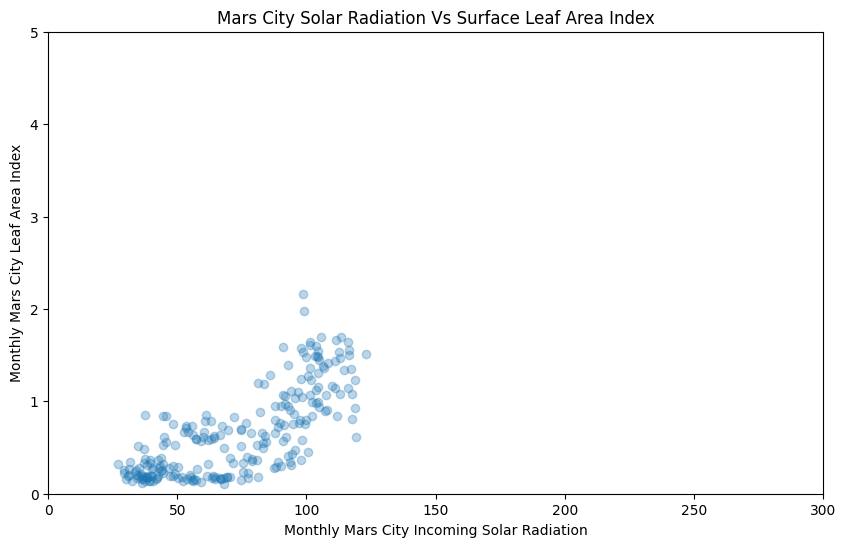

In [17]:
#Create scatterplot for new Mars-generated data
plt.figure(figsize=(10,6))
plt.scatter(Mars_X, Mars_y, alpha=0.3)
plt.title('Mars City Solar Radiation Vs Surface Leaf Area Index')
plt.xlabel('Monthly Mars City Incoming Solar Radiation')
plt.ylabel('Monthly Mars City Leaf Area Index')

#Show Mars data to scale inside identical Washington DC chart size
plt.xlim(0, 300)
plt.ylim(0, 5)
plt.show()

Calculate Mars version linear regression for vegetation growth impacted by Martian solar radiation:

In [18]:
regression = LinearRegression()
regression.fit(Mars_X, Mars_y)

LinearRegression()

Slope coefficient:

In [19]:
regression.coef_    # theta_1

array([[0.01317249]])

In [20]:
#Intercept
regression.intercept_

array([-0.30497496])

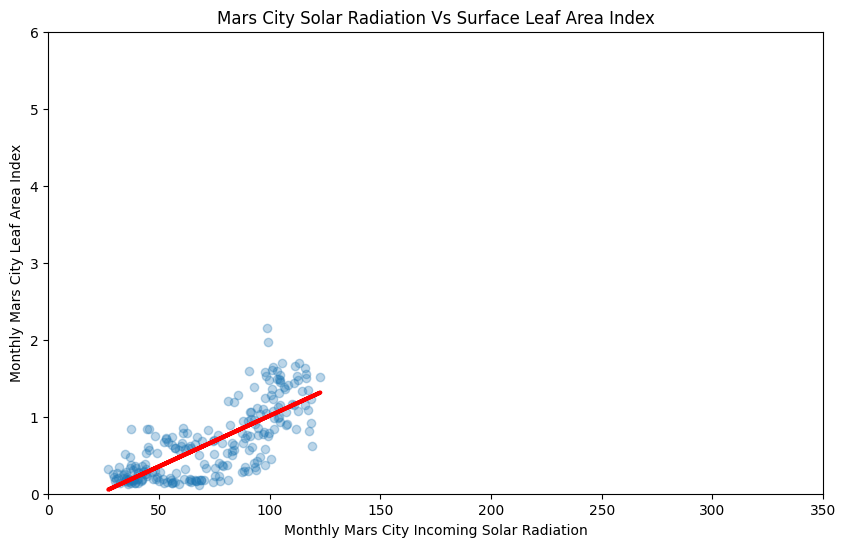

In [21]:
# Plot resulting Mars verson linear regression:
plt.figure(figsize=(10,6))
plt.scatter(Mars_X, Mars_y, alpha=0.3)

# Adding the regression line here:
plt.plot(Mars_X, regression.predict(Mars_X), color='red', linewidth=3)

plt.title('Mars City Solar Radiation Vs Surface Leaf Area Index')
plt.xlabel('Monthly Mars City Incoming Solar Radiation')
plt.ylabel('Monthly Mars City Leaf Area Index')

# SHOW TO SCALE WITH DC LINEAR REGRESSION
plt.xlim(0, 350)
plt.ylim(0, 6)
plt.show()

In [22]:
#Getting r square from Regression
regression.score(Mars_X, Mars_y)

0.5678209093011701